In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
data = datasets.load_iris().data
target = datasets.load_iris().target
X_train, X_test, y_train, y_test = train_test_split(data, target,  test_size = 0.3)

columns= ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']

df = pd.DataFrame(data = X_train, columns=columns)
df['classe'] = y_train

In [ ]:
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,classe
0,5.7,2.6,3.5,1.0,1
1,5.2,4.1,1.5,0.1,0
2,6.3,2.3,4.4,1.3,1
3,6.2,3.4,5.4,2.3,2
4,5.3,3.7,1.5,0.2,0
...,...,...,...,...,...
100,6.9,3.1,4.9,1.5,1
101,5.1,3.8,1.6,0.2,0
102,5.4,3.9,1.7,0.4,0
103,6.4,3.1,5.5,1.8,2


In [ ]:
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,classe
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,5.827619,3.062857,3.771429,1.201905,1.000000
std,0.803058,0.459778,1.737135,0.757651,0.808608
min,4.400000,2.000000,1.200000,0.100000,0.000000
25%,5.100000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.700000,4.400000,6.700000,2.500000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe07eca9ac0>,
      dtype=object)

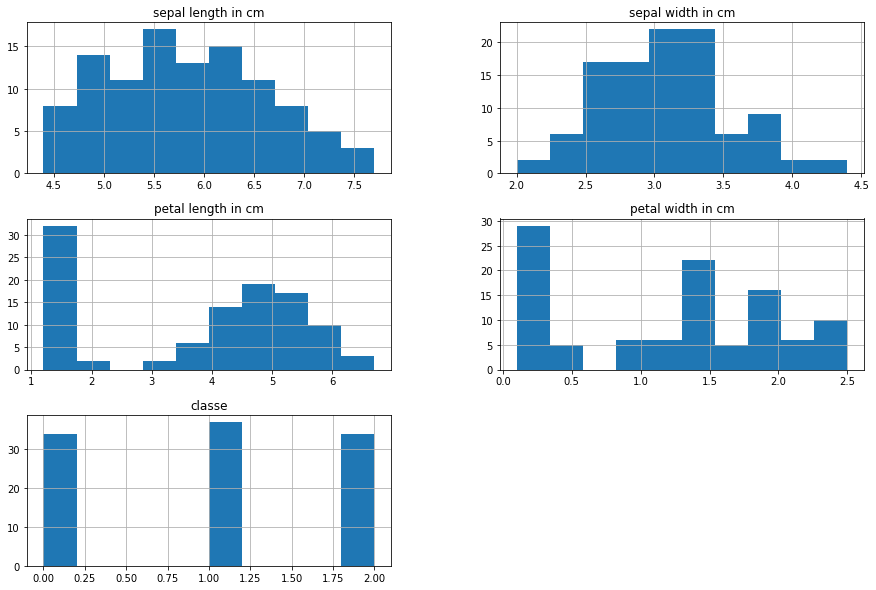

In [ ]:
df.hist(figsize=(15,10))

In [ ]:
def generateXvector(X):
    """ Prendre la matrice des variables indépendantes d'origine et ajouter une ligne de 1 qui correspond à x_0
         Paramètres:
         X : matrice des variables indépendantes
         Valeur de retour : la matrice qui contient toutes les valeurs de l'ensemble de données, sans inclure les variables de résultats.
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [ ]:
def theta_init(X):
    """ Générer une valeur initiale du vecteur θ à partir de la matrice originale des variables indépendantes
          Paramètres:
           X : matrice des variables indépendantes
         Valeur de retour : un vecteur de thêta rempli d'une estimation initiale
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

In [ ]:
def implementation_of_SGD_for_Multivariable_Linear_Regression(X,y,learningrate, iterations):
    """ Trouver le modèle de régression multivariée pour l'ensemble de données
          Paramètres:
           X : matrice des variables indépendantes
           y : matrice des variables dépendantes
           taux d'apprentissage : taux d'apprentissage de la descente de gradient stochastique
           itérations : le nombre d'itérations
         Valeur de retour : le vecteur thêta final et le tracé de la fonction de coût
    """  
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    theta = theta.T[0]
    m = len(X)
    for i in range(iterations):
        # Choisir au hasard un élément de l'ensemble d'entraînement
        randem_index = random.randrange(len(X))
        random_value = vectorX[randem_index]
        gradients = 1/m * random_value.T * ((random_value * theta).sum() - y_train[randem_index])
        theta = theta - learningrate * gradients
        y_pred = np.sum(vectorX*theta, axis=1)
        cost_value = 1/(2*len(y))*((y_pred - y)**2) 
        # Calculer la perte pour chaque élément de l'ensemble d'entraînement
        total = 0
        for i in range(len(y)):
            total += cost_value[i] 
            # Calculer la fonction de coût pour chaque itération
        cost_lst.append(total)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta

In [ ]:
def predict(X_train,y_train, X_test,learningrate = 0.001, iterations = 10):
  theta = implementation_of_SGD_for_Multivariable_Linear_Regression(X_train,y_train,learningrate, iterations)
  print(theta)
  y_pred = []
  data = generateXvector(X_test)
  multiplication = 0
  for i in range(0, len(data)):
    for j in range(0, len(theta)):
      multiplication += theta[j] * data[i][j]
    y_pred.append(multiplication)
    multiplication = 0
  return [round(y) for y in y_pred]


[-0.01905173 -0.28370981  0.22074431  0.32749333  0.60882406]


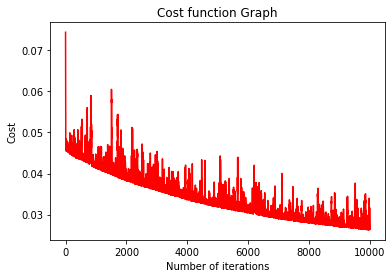

In [ ]:
y_pred = predict(X_train,y_train, X_test,learningrate = 0.1, iterations = 10000)

In [ ]:
y_pred

[2,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0]

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9555555555555556


In [ ]:
Confusion_Matix = confusion_matrix(y_test,y_pred)
Confusion_Matix

array([[ 0,  0,  0,  0,  0],
       [ 2, 14,  0,  0,  0],
       [ 0,  3,  9,  1,  0],
       [ 0,  0,  3, 12,  1],
       [ 0,  0,  0,  0,  0]])